<h1><center> Car CO2 Emission Prediction </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, the car CO2 emission volumes are anaylized to get an emission model. Then this model is used to predict the CO2 emission based on several metrics. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Visualization</li>
                <li>Descriptive</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Linear Regression</li>
                <li>Polynomial Regression</li>
                <li>Ridge Regression</li>
                <li>Decision Tree Regression</li>
                <li>Support Vector Regression</li>
                <li>Lasso Regression</li>
                <li>Gaussian Regression</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

This dataset contains car fuel consumption, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01) Columns in this dataset are:

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 1. Download Data

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [4]:
#download the data
car_data = pd.read_csv(file_name)

In [5]:
#display the first 10 rows of data
car_data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## 2. Data Wrangling

In [6]:
#Evaluating the missing data
missing_data = car_data.isnull()
missing_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


"True" measn the data is missing. From the first 5 rows, there seem no missing data. 

In [7]:
#Here use info() to count non-null values or missing values in each column
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Nice. There is no missing data in this dataset.

#### Correct data format

In [8]:
# check the data type
car_data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

Data types look all right.

## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data to predict price of car. Here, we analyze individual feature patterns using visualization and description.

Let's first calculate the correlation between variabels. 

In [9]:
#calcualte correlation
car_data.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [10]:
car_data['MODELYEAR'].value_counts()

MODELYEAR
2014    1067
Name: count, dtype: int64

In [11]:
car_data['VEHICLECLASS'].value_counts()

VEHICLECLASS
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: count, dtype: int64

In [12]:
car_data['ENGINESIZE'].value_counts()

ENGINESIZE
2.0    158
3.6     92
3.5     83
3.0     75
1.6     65
2.4     61
2.5     56
5.3     48
5.0     39
1.8     37
3.7     35
6.2     32
1.4     30
4.0     22
4.4     20
4.7     17
3.8     16
5.7     16
6.0     14
5.5     14
3.4     12
1.5     12
2.7     11
4.6     10
4.8     10
4.3     10
3.2      9
5.4      8
5.2      6
4.2      6
5.6      6
3.3      5
6.4      5
1.2      4
6.7      4
1.0      3
5.9      3
6.6      3
6.8      2
2.1      2
8.4      2
5.8      1
6.5      1
6.3      1
1.3      1
Name: count, dtype: int64

In [13]:
car_data['CYLINDERS'].value_counts()

CYLINDERS
4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: count, dtype: int64

In [14]:
car_data['TRANSMISSION'].value_counts()

TRANSMISSION
A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: count, dtype: int64

In [15]:
car_data['FUELTYPE'].value_counts()

FUELTYPE
X    514
Z    434
E     92
D     27
Name: count, dtype: int64

From above tables, we can see the correlations between two variables. If the correlation is close to 1, it means two variabels are positively correlated. Otherwise, if the correlation is close to -1, it means two variables are negatively correlated. If the correlation is close to 0, it means two variabels are not correlated.

Next, we visualize the numerical variabels with CO2 emission.

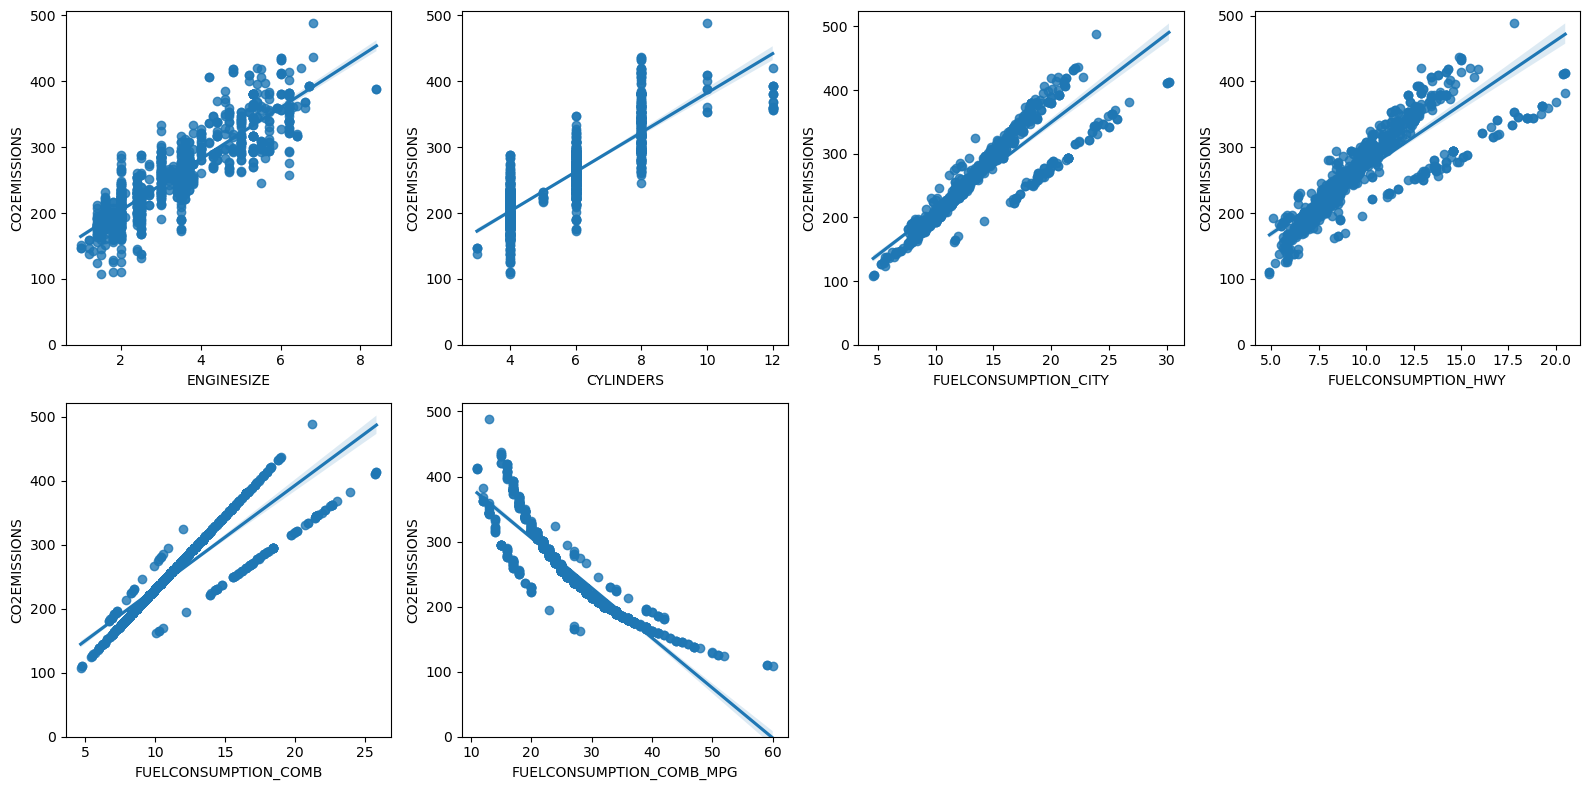

In [16]:
# use regplot

#ENGINESIZE
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
sns.regplot(x='ENGINESIZE',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()

#CYLINDERS
plt.subplot(2,4,2)
sns.regplot(x='CYLINDERS',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()

#FUELCONSUMPTION_CITY
plt.subplot(2,4,3)
sns.regplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()

#FUELCONSUMPTION_HWY
plt.subplot(2,4,4)
sns.regplot(x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()

#FUELCONSUMPTION_COMB
plt.subplot(2,4,5)
sns.regplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()

#FUELCONSUMPTION_COMB_MPG	
plt.subplot(2,4,6)
sns.regplot(x='FUELCONSUMPTION_COMB_MPG',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()




From above plots, it is clear that there are several varaibles hightl correlated with CO2 emmissions, which are "enginesize", "cylinders", "fuelconsumption_city", "fuelconsumption_hwy", and "fuelconsumption_comn". "Fuelconsumption_comn_MPG" is negatively correlated with CO2 emissions. We can also visualize other variables using box plots. 

#### Categorical Variables

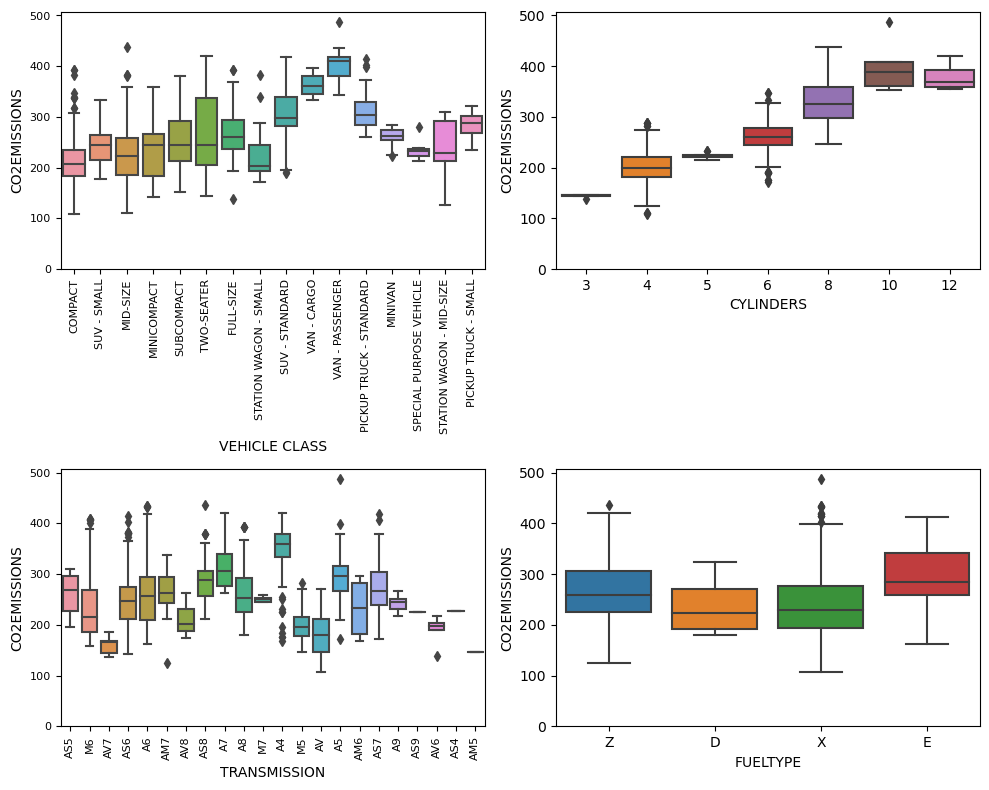

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2,1)
b=sns.boxplot(x='VEHICLECLASS',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
b.set_xlabel('VEHICLE CLASS',fontsize=10)
b.tick_params(labelsize=8)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.tight_layout()

#CYLINDERS
plt.subplot(2, 2,2)
sns.boxplot(x='CYLINDERS',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()

#TRANSMISSION
plt.subplot(2, 2,3)
b=sns.boxplot(x='TRANSMISSION',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
b.set_xlabel('TRANSMISSION',fontsize=10)
b.tick_params(labelsize=8)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.tight_layout()

# FUELTYPE
plt.subplot(2, 2,4)
sns.boxplot(x='FUELTYPE',y='CO2EMISSIONS',data=car_data)
plt.ylim(0,)
plt.tight_layout()
    

From the above plots, generally, more cylinders mean more CO2 emissions. Fuel type doesn't have strong effect on emissions. 

##### 3.2 Descriptive Statistical Analysis

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [18]:
car_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### 4. Model Development

In this section, I will develop several models that will predict the CO2 emissions using the variables or features. This is just an estimate but should give us an objective idea of how much CO2 a car emits. 

#### 4.1 Linear Regression

We konw that hte house price is correlated with multiple variables, here I use __Multiple Linear Regression__. 

In [19]:
#import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
#save the variabels and price to new variables
Variables = car_data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]]
Price = car_data['CO2EMISSIONS']

In [21]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(Variables, Price, test_size=0.20, random_state=1)

In [22]:
#create linear regression object
lm = LinearRegression()

In [23]:
#fit the linear regression
lm.fit(x_train, y_train)

LinearRegression()

In [24]:
#Let's calcualte the R^2 on the train data
print('The R-square of Linear Regression is: ', round(lm.score(x_train, y_train),4))

The R-square of Linear Regression is:  0.8895


In [25]:
#Let's calcualte the R^2 on the test data
print('The R-square of Linear Regression is: ', round(lm.score(x_test, y_test),4))

The R-square of Linear Regression is:  0.8881


It is obvious that linear regression fit the data quite well. 

In [26]:
#predict price using test data
lm_predict = lm.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, lm_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  454.02


In [28]:
# Visualize the results
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

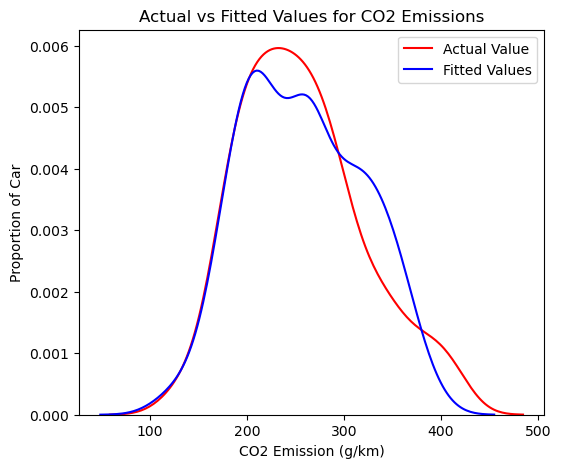

In [29]:
#plot the results
plt.figure(figsize=(6, 5))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lm_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for CO2 Emissions')
plt.xlabel('CO2 Emission (g/km)')
plt.ylabel('Proportion of Car')
plt.legend()

We can see that the fitted values are reasonably close to the actual values. However, CO2 emissions higher than 200 need more improvement. 

#### 4.2 Polynomial Regression

__Polynomial Regression__ is a particular case of the general linear regression model or multiple linear regression models. It use non-lieanr relationshipls using high order polynomial terms to fit the variables.

In [30]:
#import the library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('model',LinearRegression())]

In [32]:
pipe=Pipeline(Input)

In [33]:
#standard scaler takes float as inputs. Let's convert Variables data type.
Variables = Variables.astype(float)

In [34]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [35]:
# Find the R^2 for polynomial fit
print('The R-square of Polynomial Regression is: ', round(pipe.score(x_test, y_test),4))

The R-square of Polynomial Regression is:  0.947


In [36]:
price_pipe = pipe.predict(x_test)

In [37]:
mse = mean_squared_error(y_test, price_pipe)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  215.19


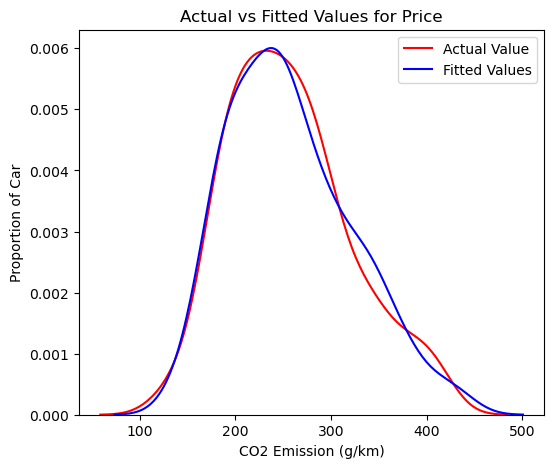

In [38]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_pipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('CO2 Emission (g/km)')
plt.ylabel('Proportion of Car')
plt.legend()

Clearly, polynomial regression predicted better results than linear regression, but there are still rooms to improve. 

#### 4.3 Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. Here I compare it with other two regressions. I use __GridSearchCV__ to find the best hyperparameter.

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [40]:
#define the parameters
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [41]:
#create ridge regression object
RR = Ridge()

In [42]:
#create a ridge grid search object
grid = GridSearchCV(RR,parameters,cv=4) #cv determines the number of folds. 

In [43]:
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [44]:
BestRR = grid.best_estimator_
BestRR

Ridge(alpha=10)

In [45]:
# Find the R^2 for ridge regression fit
print('The R-square of Ridge Regression is: ', round(BestRR.score(x_test, y_test),4))

The R-square of Ridge Regression is:  0.8883


In [46]:
#predict the price
price_ridge = BestRR.predict(x_test)

In [47]:
mse = mean_squared_error(y_test, price_ridge)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  453.02


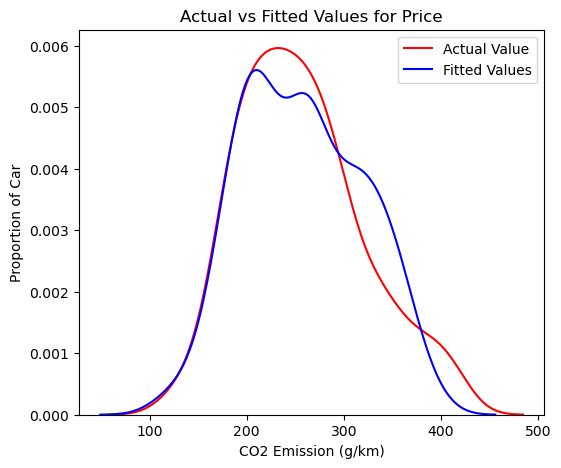

In [48]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('CO2 Emission (g/km)')
plt.ylabel('Proportion of Car')
plt.legend()

The Ridge Regression looks very close to linear regression. Compared all three models, Polynomial Regression fits the data best.  

#### 4.4 Decision Tree Regression

Decision tree is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve. It is a supervised learning approach used in machine learning. 

Regression Trees are implemented using `DecisionTreeRegressor` from `sklearn.tree`

The important parameters of `DecisionTreeRegressor` are

`criterion`: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error

`max_depth` - The max depth the tree can be

`min_samples_split` - The minimum number of samples required to split a node

`min_samples_leaf` - The minimum number of samples that a leaf can contain

`max_features`: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
regression_tree = DecisionTreeRegressor(criterion = "friedman_mse")

In [51]:
regression_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [52]:
print('The R-square of Regression Trees is: ', round(regression_tree.score(x_test, y_test),4))

The R-square of Regression Trees is:  0.9461


In [53]:
price_tree = regression_tree.predict(x_test)

In [54]:
mse = mean_squared_error(y_test, price_tree)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  218.54


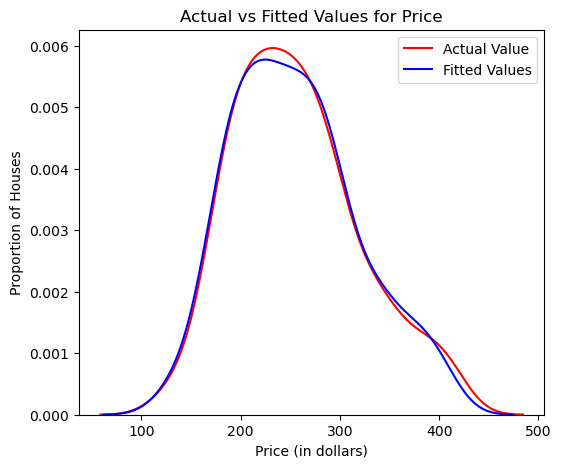

In [55]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_tree, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

#### 4.5 Support Vector Regression (SVR)
Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

SVR can use both linear and non-linear kernels. A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. The choice of kernel depends on the data’s characteristics and the task’s complexity.

In [56]:
from sklearn.svm import LinearSVR 

param_grid = {'C': np.logspace(-2, 3, 10), 
              'epsilon': np.logspace(-2,1,5)}  

# create an SVR model with a linear kernel 
svr = LinearSVR()
svr_grid = GridSearchCV(svr, param_grid, refit=True)
svr_grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVR(),
             param_grid={'C': array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03]),
                         'epsilon': array([ 0.01      ,  0.05623413,  0.31622777,  1.77827941, 10.        ])})

In [57]:
print("tuned hpyerparameters :(best parameters) ",svr_grid.best_params_)
SVR_Best_Score = svr_grid.best_score_
print("accuracy :",SVR_Best_Score)

tuned hpyerparameters :(best parameters)  {'C': 21.544346900318846, 'epsilon': 10.0}
accuracy : 0.8552590135593305


In [58]:
print('The R-square of SVR is: ', round(svr_grid.score(x_test, y_test),4))
price_svr = svr_grid.predict(x_test)
mse = mean_squared_error(y_test, price_svr)
print('The mean square error of price and predicted value is: ', round(mse,2))

The R-square of SVR is:  0.8602
The mean square error of price and predicted value is:  567.17


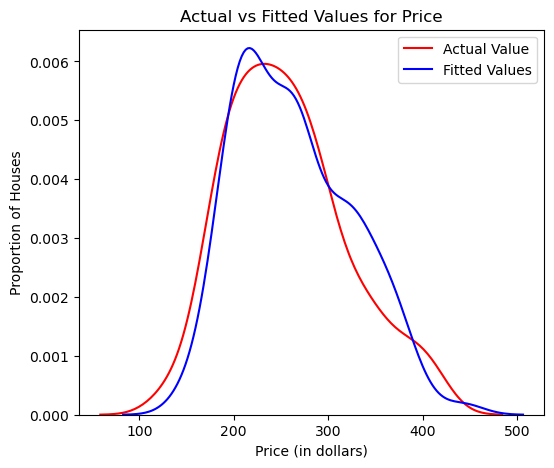

In [59]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_svr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

#### 4.6 Lasso Regression

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

In [60]:
from sklearn.linear_model import Lasso
params = {'alpha': (np.logspace(-8, 8, 40))}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, params, cv = 10)
lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 2.57191381e-08, 6.61474064e-08, 1.70125428e-07,
       4.37547938e-07, 1.12533558e-06, 2.89426612e-06, 7.44380301e-06,
       1.91448198e-05, 4.92388263e-05, 1.26638017e-04, 3.25702066e-04,
       8.37677640e-04, 2.15443469e-03, 5.54102033e-03, 1.42510267e-02,
       3.66524124e-02, 9.42668455e-02, 2.42446202e-01, 6.23550734e-01,
       1.60371874e+00, 4.12462638e+00, 1.06081836e+01, 2.72833338e+01,
       7.01703829e+01, 1.80472177e+02, 4.64158883e+02, 1.19377664e+03,
       3.07029063e+03, 7.89652287e+03, 2.03091762e+04, 5.22334507e+04,
       1.34339933e+05, 3.45510729e+05, 8.88623816e+05, 2.28546386e+06,
       5.87801607e+06, 1.51177507e+07, 3.88815518e+07, 1.00000000e+08])})

In [61]:
print("Lasso tuned hpyerparameters :(best parameters) ",lasso_grid.best_params_)
SVR_Best_Score = lasso_grid.best_score_
print("Lasso best accuracy :",SVR_Best_Score)

Lasso tuned hpyerparameters :(best parameters)  {'alpha': 0.6235507341273913}
Lasso best accuracy : 0.8865903320000059


In [62]:
print('The R-square of Lasso is: ', round(lasso_grid.score(x_test, y_test),4))
price_svr = lasso_grid.predict(x_test)
mse = mean_squared_error(y_test, price_svr)
print('The mean square error of price and predicted value is: ', round(mse,2))

The R-square of Lasso is:  0.8883
The mean square error of price and predicted value is:  453.15


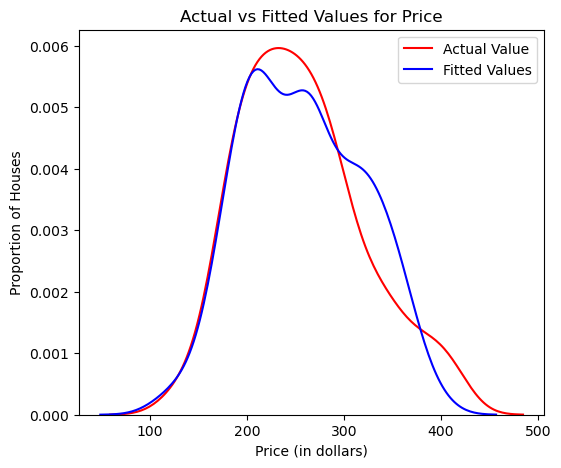

In [63]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_svr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

#### 4.7 Gaussian Regression

Gaussian Processes (GP) are a nonparametric supervised learning method used to solve regression and probabilistic classification problems.

The advantages of Gaussian processes are:

- The prediction interpolates the observations (at least for regular kernels).

- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.

- Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of Gaussian processes include:

- Our implementation is not sparse, i.e., they use the whole samples/features information to perform the prediction.

- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

In [64]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [65]:
kernel = DotProduct() + WhiteKernel()

In [66]:
gpr = GaussianProcessRegressor(kernel=kernel, random_state=2).fit(x_train, y_train)

In [67]:
print('The R-square of Lasso is: ', round(gpr.score(x_test, y_test),4))
price_gpr = gpr.predict(x_test)
mse = mean_squared_error(y_test, price_gpr)
print('The mean square error of price and predicted value is: ', round(mse,2))

The R-square of Lasso is:  0.8854
The mean square error of price and predicted value is:  464.76


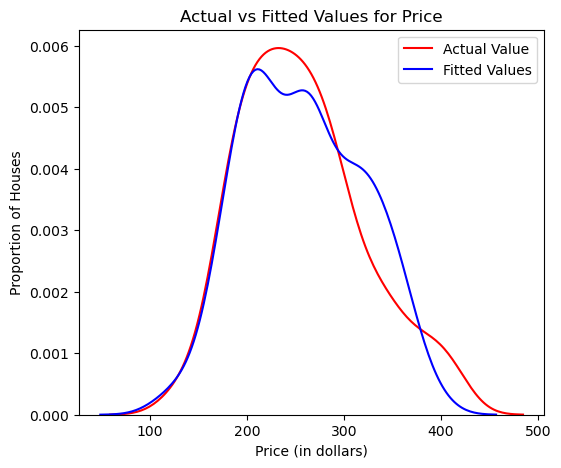

In [68]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_svr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

### 5. Summary

There are other regression algorithms which can be used on this dataset. Here doens't test all of them. Compared those methods, polynomial regression has the best accuracy and decision tree regression has the very close accuracy. 